<a href="https://colab.research.google.com/github/estherc247/cz4041_ML/blob/main/1_Submitted_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import data from Google Drive 
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [7]:
#Load Data
data_dir_train = '/content/gdrive/MyDrive/Y4/CZ4041_Machine_Learning/plant_data/train.zip'
data_dir_test = '/content/gdrive/MyDrive/Y4/CZ4041_Machine_Learning/plant_data/test.zip'

#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile(data_dir_train, 'r') #Opens the zip file in read mode
zip_test = zipfile.ZipFile(data_dir_test, 'r')
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_test.extractall('/tmp/test')
zip_ref.close()
zip_test.close()

In [3]:
#Import Libraries 
import tensorflow as tf 
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import pandas as pd 
from PIL import Image
import glob

In [4]:
#Define directory path
train_url = '/tmp/train'
test_url ='/tmp/test'

In [5]:
#define parameters 
batch_size = 32
img_width = 240
img_height = 240 
epochs = 20

In [6]:
#Split data 

train_image_data = ImageDataGenerator(
    validation_split = 0.2,
    rescale = 1.0/255.0,
    horizontal_flip = True, 
    zoom_range=0.2, 
    shear_range = 0.2,
)

train_ds = train_image_data.flow_from_directory(
  train_url,
  shuffle = True,
  target_size=(img_height, img_width),
  class_mode = 'categorical',
  batch_size=batch_size,
  subset="training")

val_ds = train_image_data.flow_from_directory(
  train_url,
  shuffle = True,
  target_size=(img_height, img_width),
  class_mode = 'categorical',
  batch_size=batch_size,
  subset="validation")

Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.


In [7]:
#Create Model
from tensorflow.keras.applications.xception import Xception

model = tf.keras.Sequential([
            Xception(input_shape=[240,240, 3], include_top=False, weights='imagenet'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(12, activation='softmax')
])

model.trainable = True
model.get_layer('xception').trainable
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               16777344  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1548      
Total params: 37,640,372
Trainable params: 37,585,844
Non-trainable params: 54,528
_________________________________________________________________


In [8]:
#Compile model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#Save model checkpoint
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [10]:
history = model.fit_generator(
                train_ds,
                steps_per_epoch = train_ds.samples//batch_size,
                validation_data = val_ds, 
                validation_steps = val_ds.samples//batch_size,
                epochs = epochs,
                callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
118/118 [==============================] - 225s 2s/step - loss: 2.4790 - accuracy: 0.2487 - val_loss: 4.3247 - val_accuracy: 0.3330
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
118/118 [==============================] - 210s 2s/step - loss: 0.8925 - accuracy: 0.7043 - val_loss: 1.1269 - val_accuracy: 0.6778
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/20
118/118 [==============================] - 211s 2s/step - loss: 0.3878 - accuracy: 0.8709 - val_loss: 0.3957 - val_accuracy: 0.8685
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/20
118/118 [==============================] - 226s 2s/step - loss: 0.3400 - accuracy: 0.8862 - val_loss: 1.7423 - val_accuracy: 0.7608
Epoch 5/20
118/118 [==============================] - 226s 2s/step - loss: 0.2833 - accuracy: 0.9109 - val_loss: 1.7012 - val_accuracy: 0.7543
Epoch 6/20
118/118 [==============================] - 209s 2s/step - loss: 0.3172 - accuracy: 0.9053 - val_loss: 3.9774 - val_accuracy: 0.6530
Epoch 7/20
118/118 [==============================] - 210s 2s/step - loss: 0.3024 - accuracy: 0.9165 - val_loss: 0.4979 - val_accuracy: 0.8847
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 8/20
118/118 [==============================] - 210s 2s/step - loss: 0.2283 - accuracy: 0.9340 - val_loss: 1.1022 - val_accuracy: 0.7478
Epoch 9/20
118/118 [==============================] - 210s 2s/step - loss: 0.1877 - accuracy: 0.9393 - val_loss: 0.4727 - val_accuracy: 0.8869
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 10/20
118/118 [==============================] - 209s 2s/step - loss: 0.4004 - accuracy: 0.8966 - val_loss: 6.5943 - val_accuracy: 0.6778
Epoch 11/20
118/118 [==============================] - 209s 2s/step - loss: 0.2398 - accuracy: 0.9265 - val_loss: 0.3450 - val_accuracy: 0.9256
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 12/20
118/118 [==============================] - 208s 2s/step - loss: 0.1818 - accuracy: 0.9422 - val_loss: 0.4456 - val_accuracy: 0.9041
Epoch 13/20
118/118 [==============================] - 208s 2s/step - loss: 0.1768 - accuracy: 0.9467 - val_loss: 0.6871 - val_accuracy: 0.9062
Epoch 14/20
118/118 [==============================] - 209s 2s/step - loss: 0.2393 - accuracy: 0.9295 - val_loss: 0.7224 - val_accuracy: 0.8427
Epoch 15/20
118/118 [==============================] - 209s 2s/step - loss: 0.1578 - accuracy: 0.9486 - val_loss: 0.4769 - val_accuracy: 0.8987
Epoch 16/20
118/118 [==============================] - 209s 2s/step - loss: 0.1337 - accuracy: 0.9626 - val_loss: 0.2540 - val_accuracy: 0.9418
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 17/20
118/118 [==============================] - 224s 2s/step - loss: 0.2104 - accuracy: 0.9470 - val_loss: 1.2876 - val_accuracy: 0.7489
Epoch 18/20
118/118 [==============================] - 225s 2s/step - loss: 0.1735 - accuracy: 0.9504 - val_loss: 0.3044 - val_accuracy: 0.9062
Epoch 19/20
118/118 [==============================] - 207s 2s/step - loss: 0.1022 - accuracy: 0.9690 - val_loss: 0.2061 - val_accuracy: 0.9537
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 20/20
118/118 [==============================] - 224s 2s/step - loss: 0.0786 - accuracy: 0.9745 - val_loss: 0.2234 - val_accuracy: 0.9580
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


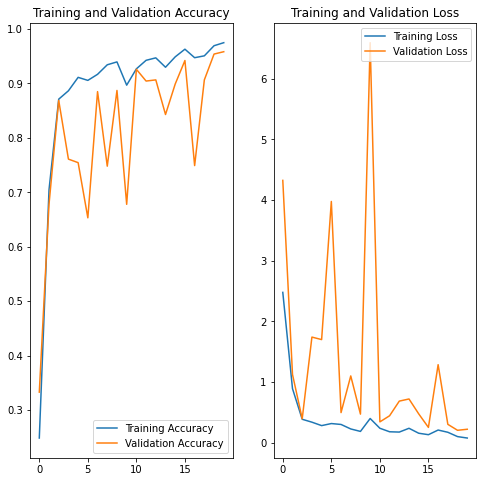

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
#Apply model to test set 
#Initialise test generator
test_image_data = ImageDataGenerator(rescale=1./255)
test_ds = test_image_data.flow_from_directory('/tmp/test/',
                                              target_size=(img_height,img_width),
                                              batch_size = 1,
                                              class_mode ='categorical',
                                              shuffle = False)

Found 794 images belonging to 1 classes.


In [ ]:
# model.save('/tmp/checkpoint/new_model.h5')

In [29]:
model.evaluate_generator(generator=val_ds, steps=val_ds.samples//batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.22360488772392273, 0.9601293206214905]

In [30]:
test_ds.reset() #maintain test order
test_predictions = model.predict_generator(test_ds, test_ds.samples, verbose=1 )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


794/794 [==============================] - 18s 21ms/step


In [32]:
import numpy as np
predicted_plant_type = np.argmax(test_predictions, axis=1)

In [33]:
labels = (train_ds.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_plant_type]

In [38]:
test_pred = []
filenames=test_ds.filenames
for name in range(len(filenames)):
   test_pred.append(filenames[name].split('/')[1])

results=pd.DataFrame({"file":test_pred,
                      "species":predictions})
results.to_csv("submission.csv",index=False)